<a href="https://colab.research.google.com/github/Renan-Domingues/LearnTheBasics-Pytorch/blob/main/Tutorials_02_Datasets%26Dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets and Dataloaders
Pytorch provides 2 data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset
this allows to use pre-loaded datasets as well my own data

`` Image Datasets = https://pytorch.org/vision/stable/datasets.html ``
`` Text Datasets = https://pytorch.org/text/stable/datasets.html ``
`` Audio Datasets = https://pytorch.org/audio/stable/datasets.html ``

### Loading a Dataset

For this example we are gone to use Fashion-mnist dataset from TorchVision.
Is a dataset consisting in 60,000 training examples and 10,000 test examples

here we find the parameters that is needed -> fashin-MNIST pytorch = https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

fashionMNIST github = https://github.com/zalandoresearch/

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.FashionMNIST(
    root="data", # onde será salvo
    train=True,
    download=True,
    transform=ToTensor() # Transformar a imagem em tensor
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16320417.65it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 295702.30it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5391539.56it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10351043.62it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### Iterating and visualizing the dataset

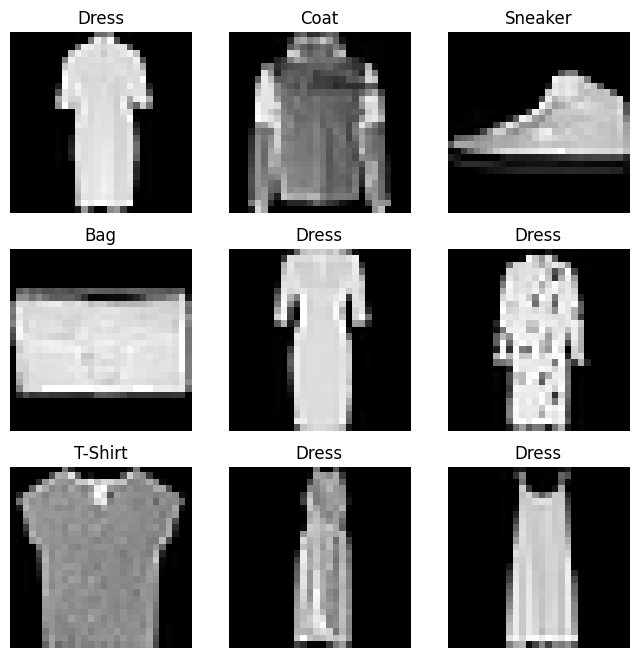

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Creating a Custom Dataset

A custom dataset class must implement __init__, __len__, and __getitem__.

The DashionMNIST images are stored in a directory img_dir
their labes are stored in a CSV file: ammptations_file

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None): # The init initialie the directory(images, annotations file and both transforms)
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

    def __len__(self): # len function returns the number of samples in our dataset
      return len(self.img_labels)

      def __getitem__(self, idx): # getitem function loads and return a sample from the dataset at the given idx
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
          image = self.transform(image)
        if self.target_transform:
          label = self.target_transform(label)
        return image, label


### Preparing data for training with dataLoaders
The dataset retrives our dataset's features and labels one sample at a time.
While traininf a model, we typically enat to pass samples in "minibatches", reshiffle the data at every epoch

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### intarete through the DataLoader

we have dawloaded that dataset into the dataloader and can iterate though the dataset as needed.
Each iteration returns a batch of training_features and train_labels
after we iterate over all betches the data is shuffled (we specified shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels  batch shape: torch.Size([64])


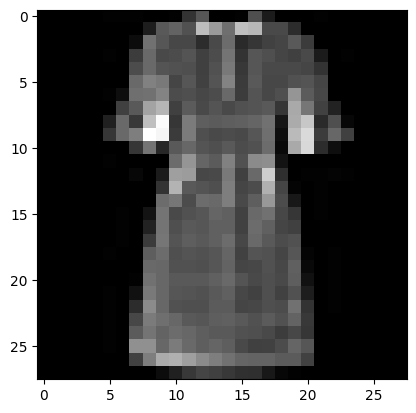

Label: 3


In [ ]:
# Display image and label.

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels  batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


### Dataset -> Importa os arquivos e transforma. DataLoader -> Prepara os arquivos e separa em batchs